# **STAT 200 Project (120 points)**

#### **Alexandra Shelton


---

<br>

For your project, you must analyze data from the [COPDGene study](http://www.copdgene.org/) using the concepts covered in this course. Please follow the directions below carefully:

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Comment all code using the `#`. This is a must!
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed project must be submitted to Canvas as a .ipynb file by the assigned due date**



<br>

---

<br>






## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking.

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Organized</font> (5 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font> (5 points)

1. Load the COPDGene dataset and show the first few lines.
2. Remove the NAs from the dataset and store as `dat1`. How many rows does `dat1` contain? Answer in a complete sentence.
3. Select all rows in the dataset where `FEV1_phase2` is `NA` and store as `dat2`. How many rows does `dat2` contain? Answer in a complete sentence.


In [ ]:
#1.
url <- ("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
copd <- read.csv(url)
head(copd)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924


In [ ]:
#2.
dat1 <- na.omit(copd)
nrow(dat1)


[1] 4000

2- dat1 contains 4000 rows.

In [ ]:
#3.
dat2 <- copd[is.na(copd$FEV1_phase2),]
nrow(dat2)

[1] 1747

3- Dat2 contains 1747 rows.

####<font color=red>Task 2</font> (10 points)

1. From `dat1`, plot the histogram of `FEV1`
2. Calculate the percentage of `FEV1` values within one standard deviation of its mean. Answer in a complete sentence.
3. Calculate the percentage of `FEV1` values within 2 standard deviations of its mean. Answer in a complete sentence.
4. Use your answers from 2.1-2.3 to determine if the FEV1 variable is approximately normally distributed.


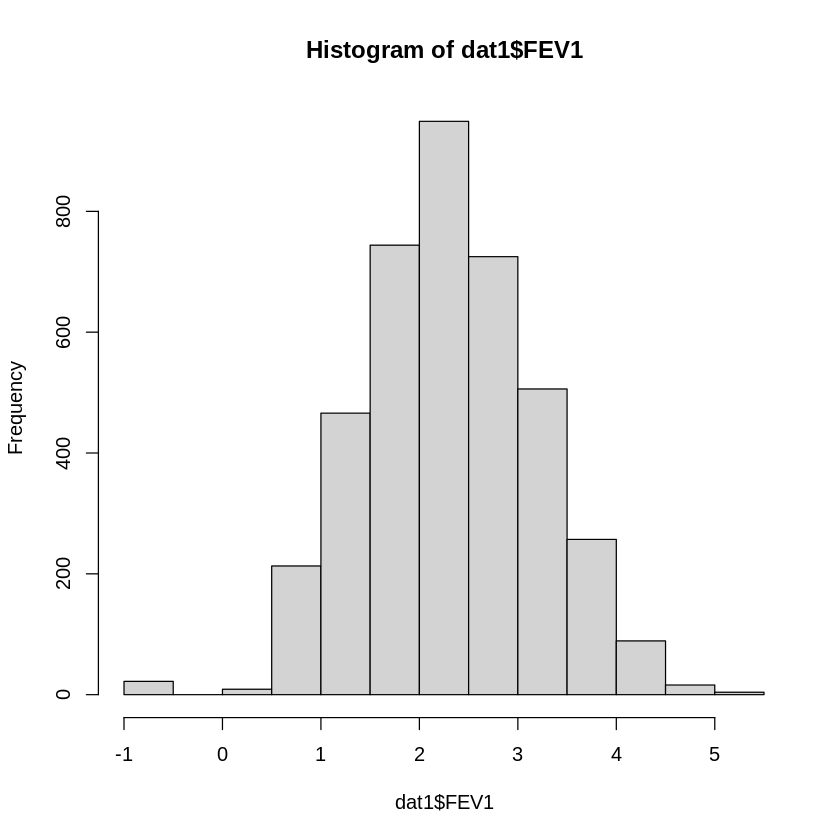

In [ ]:
#1.
hist(dat1$FEV1)

In [ ]:
#2.
mean <- mean(dat1$FEV1)
sd <- sd(dat1$FEV1)
lower <- mean-sd

higher <- mean + sd

oneSD <- dat1 [which(dat1$FEV1 < higher & dat1$FEV1 > lower ),]
nrow(oneSD) / nrow(dat1)


[1] 0.67575

In [ ]:
#3.
lower2 <- mean - (2*sd)

higher2 <- mean + (2*sd)
twoSD <- dat1 [which(dat1$FEV1 < higher2 & dat1$FEV1 > lower2),]
nrow(twoSD)/ nrow(dat1)

[1] 0.9675

3- I would say that the FEV1 is normally distributed because one standard deviation is 68 % and two is 95% and the data from FEV1 is 67% and 96% which is very close to a normal distribution.

<br>

---

<br>






####<font color=red>Task 3</font> (10 points)

1. From `dat1`, find two other numeric variables and plot their histograms.
2. Describe the histogram of the FIRST variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph
2. Describe the histogram of the SECOND variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph

[1] 4.211076 4.387981
attr(,"conf.level")
[1] 0.95

[1] 2.853386

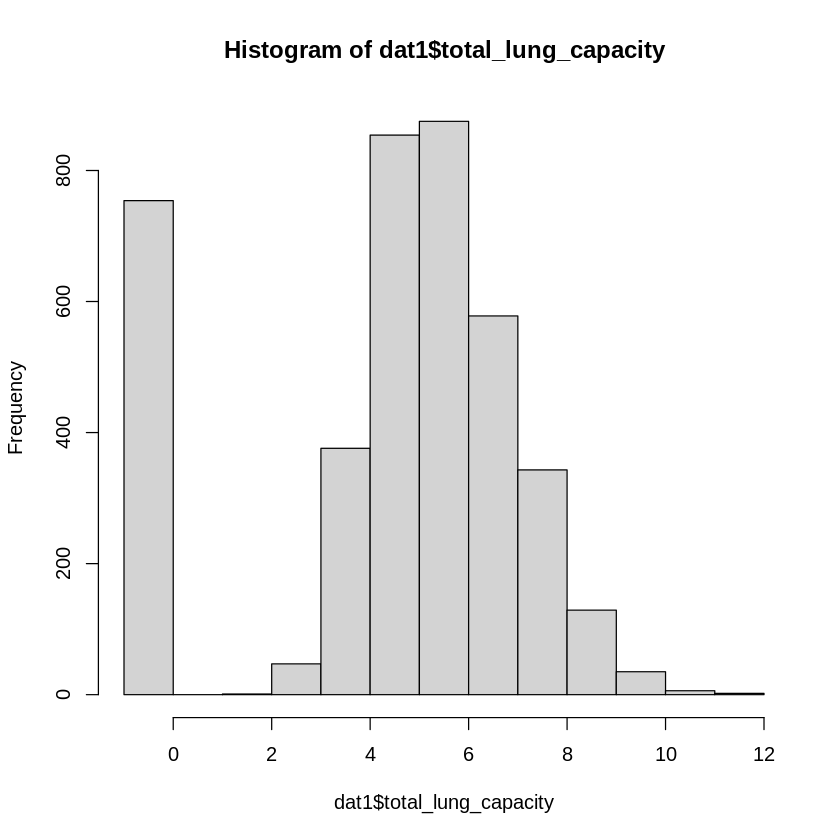

In [ ]:

#1.
hist(dat1$total_lung_capacity)

t.test(dat1$total_lung_capacity)$conf.int
sd(dat1$total_lung_capacity)

1-  The first histogram that I chose to do is the total lung capacity. From the histogram we can observe that the range is 10 ( not including the -1 because that accounts for the NA's). We can see without the negative 1 that it does follow a pretty normal distribution. The standard deviation is 2.85. The mean is about 4.3. We can say that we are 95% confident that the true population mean lies between 4.21 and 4.38.

[1] 0.8262204


	One Sample t-test

data:  dat1$FEV1_phase2
t = 162.3, df = 3999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 2.094649 2.145873
sample estimates:
mean of x 
 2.120261 


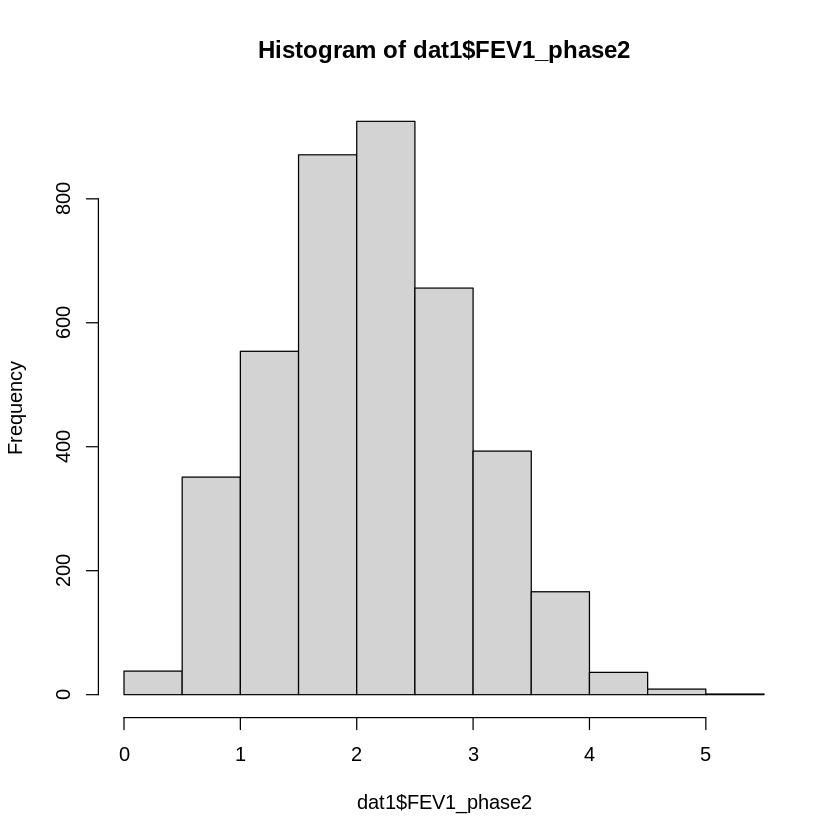

In [ ]:
#2.
hist(dat1$FEV1_phase2)

sd(dat1$FEV1_phase2)
t.test(dat1$FEV1_phase2)

2- 2 For the second histogram I decided to use FEV1 phase 2. From this histogram we can observe that the range is 5. The mean of the data is about 2. The standrard deviation is about 0.8. We can see that the data fits a normal distribution. We can also say with 95% confidence that the true population mean lies between 2 and 2.1.

<br>

---

<br>






####<font color=red>Task 4</font> (10 points)

1. Using `dat1`, create a boxplot to visualize the relationship between `FEV1_phase2` and `smoking_status`.
2. Based on the boxplot, which group tends to have better breathing capacity?
3. Select rows in `dat1` corresponding to a `smoking_status` of `Current smoker` or `Former smoker`. Create a 95% confidence interval to determine if average FEV1 for phase 2 is different between current or former smokers. Explain your answer in complete sentences.

<br>

---

<br>






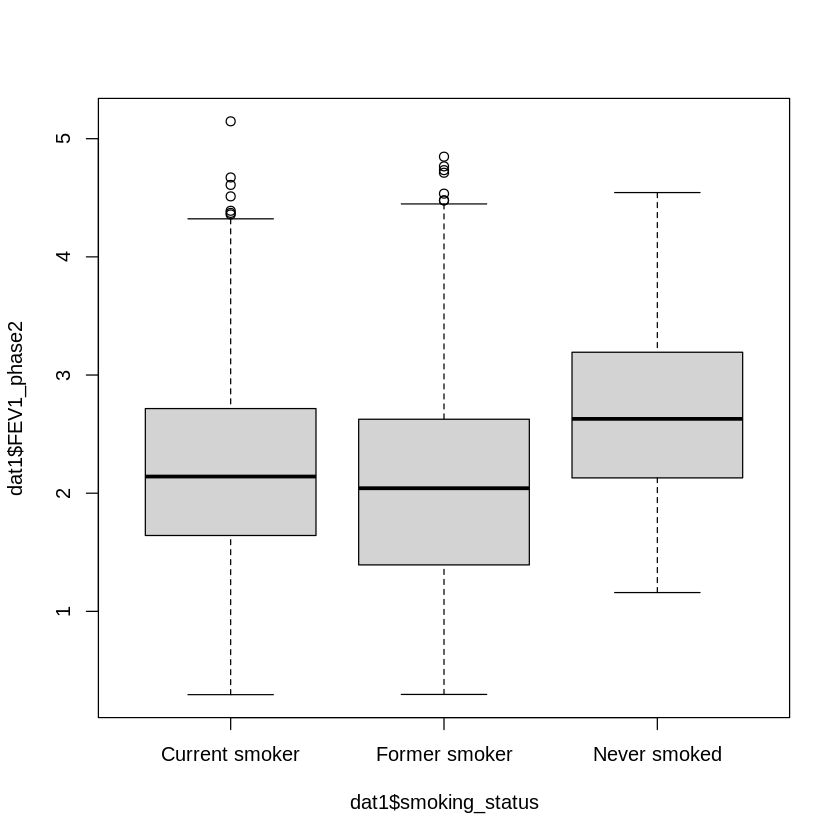

In [ ]:
#1.
boxplot(dat1$FEV1_phase2 ~ dat1$smoking_status)

2- It seems that Never have smoked has better breathing capacity.

In [ ]:
#3.

dat3 <- dat1[-which(dat1$smoking_status == "Never smoked"),]
t.test(dat3$FEV1_phase2 ~ dat3$smoking_status)$conf.int

[1] 0.08155305 0.18408473
attr(,"conf.level")
[1] 0.95

3- FEV1_phase2 is different for former and current smokers because 0 is not included in the 95% confidence interval.

####<font color=red>Task 5</font> (10 points)

1. Using `dat1`, create two more boxplots to visualize the relationship between `FEV1_phase2` and two other categorical variables.
2. For the first variable, use a 95% confidence interval to determine if the average `FEV1_phase2` is different between two categories.
3. For the second variable, use a 95% confidence interval to determine if the average `FEV1_phase2` in phase 2 is different between two categories.

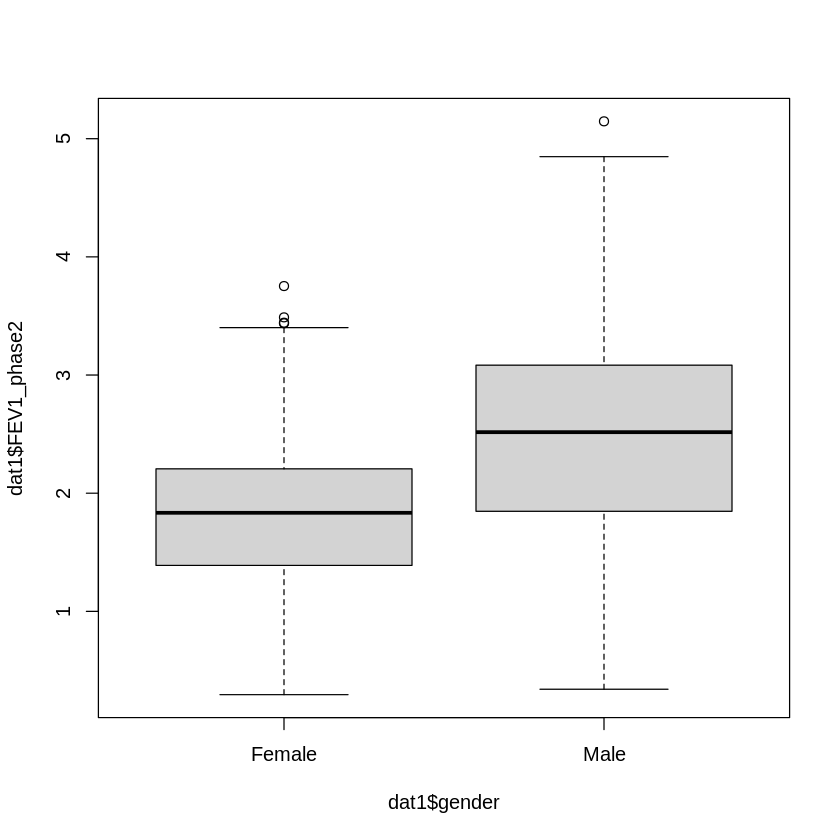

In [ ]:
boxplot(dat1$FEV1_phase2 ~ dat1$gender)

In [ ]:
#2.
t.test(dat1$FEV1_phase2 ~ dat1$gender)$conf.int

[1] -0.6918855 -0.5976740
attr(,"conf.level")
[1] 0.95

2- The average FEV1_phase2 is different between the two categories because 0 is not included in the interval.

<br>

---

<br>






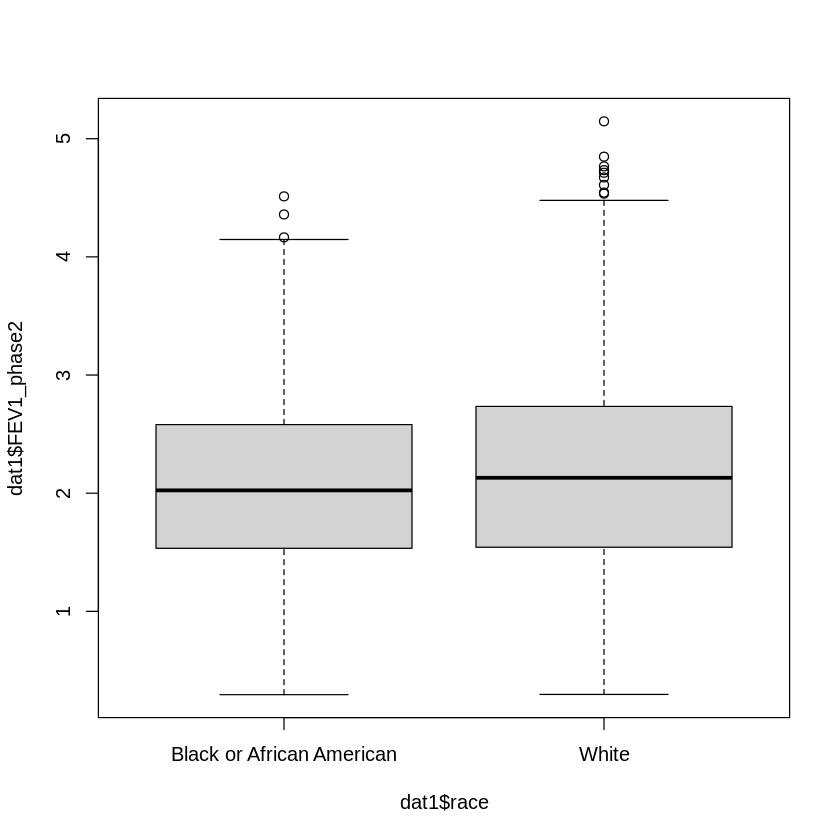

In [ ]:
#3.
boxplot(dat1$FEV1_phase2 ~ dat1$race)

In [ ]:
#3.
t.test(dat1$FEV1_phase2 ~ dat1$race)$conf.int

[1] -0.12506982 -0.01728048
attr(,"conf.level")
[1] 0.95

3- The average FEV1_phase2 is different between the two categories because 0 is not included in the interval.

####<font color=red>Task 6</font> (20 points)

1. Using `dat1`, create a scatterplot visualizing the relationship between `FEV1_phase2` (y-axis) and `FEV1` (x-axis). Note that values that are -1 are missing observations. You may ignore this for this class.
2. What relationship do you observe based on the scatterplot?
3. Fit a simple linear regression model by regressing `FEV1_phase2` (Y) on `FEV1` (X). Summarize the regression.
4. Describe the $R^2$ of the regression in the context of its definition.
5. What is the slope and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
6. What is the intercept and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
7. Use a 95% confidence interval to determine if the slope is significantly less than 1. Explain what this means in terms of breathing health of the patients.

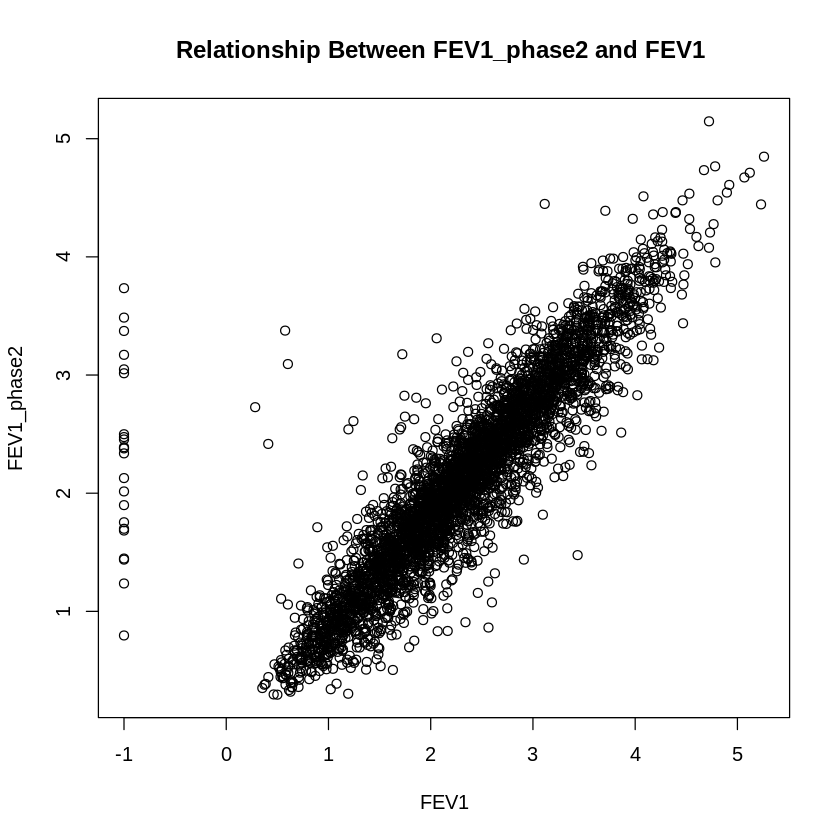

In [ ]:
#1.
plot(dat1$FEV1, dat1$FEV1_phase2,
     xlab = "FEV1",
     ylab = "FEV1_phase2",
     main = "Relationship Between FEV1_phase2 and FEV1 ")

2- Based on the scatter plot I notice a linear relationship between FEV1_phase2 amd FEV1. I notice that it is a positive linear realtionship meaning that as FEV1 is larger, so is FEV1 phase 2.

[1] "lm"

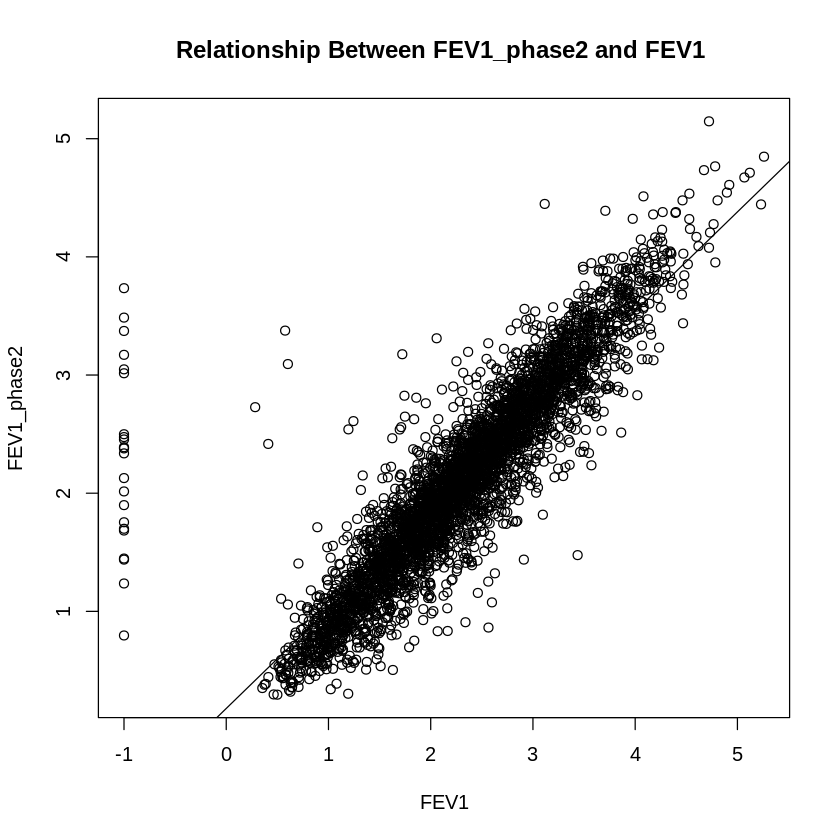

In [ ]:
#3
fit <- lm(FEV1_phase2 ~ FEV1, data = dat1)
class(fit)

plot(dat1$FEV1, dat1$FEV1_phase2,
     xlab = "FEV1",
     ylab = "FEV1_phase2",
     main = "Relationship Between FEV1_phase2 and FEV1 ")

     abline(fit)

In [ ]:
#3 continued
summary(fit)


Call:
lm(formula = FEV1_phase2 ~ FEV1, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5909 -0.1880 -0.0144  0.1609  4.3971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.178336   0.016943   10.53   <2e-16 ***
FEV1        0.840423   0.006859  122.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3789 on 3998 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7897 
F-statistic: 1.501e+04 on 1 and 3998 DF,  p-value: < 2.2e-16


4- r^2 is used to explain the proportion of variation by including FEV1. It expresses the quantity of the changes in FEV1_phase 2  explained by the changes in FEV1.

5- The slope is 0.8 this means that each FEV1 increase (volume in 1 second) fev1_phase two increases by 0.84

6- The intercept is 0.17 this means that the average value of FEV1_phase2 is 0.17 when FEV1 is equal to 0.

In [ ]:
#7.
confint(fit, level = 0.95)

,2.5 %,97.5 %
(Intercept),0.1451177,0.2115549
FEV1,0.8269759,0.8538708


7- Yes, it is significantly less than 1 because 1 is not in the interval.  This means, that there is a significant relationship between the two variables.

####<font color=red>Task 7</font> (10 points)

1. Identify two other variables in `dat1` that you think would be related to breathing health, as measured by `FEV1_phase2`. Plot these variables using scatterplots (`FEV1_phase2` on Y axis, variable 1 or variable 2 on X axis). What do you observe? Explain in complete sentences.
2. Include these two variables (categorical or numeric), along with `FEV1`, in your regression from Task 6. Show the regression summary. Keep `FEV1_phase2` as Y.
3. Using 95% confidence intervals, are the slopes for the two variables you selected significantly different from 0? Explain and interpret in complete sentences.


<br>

---

<br>






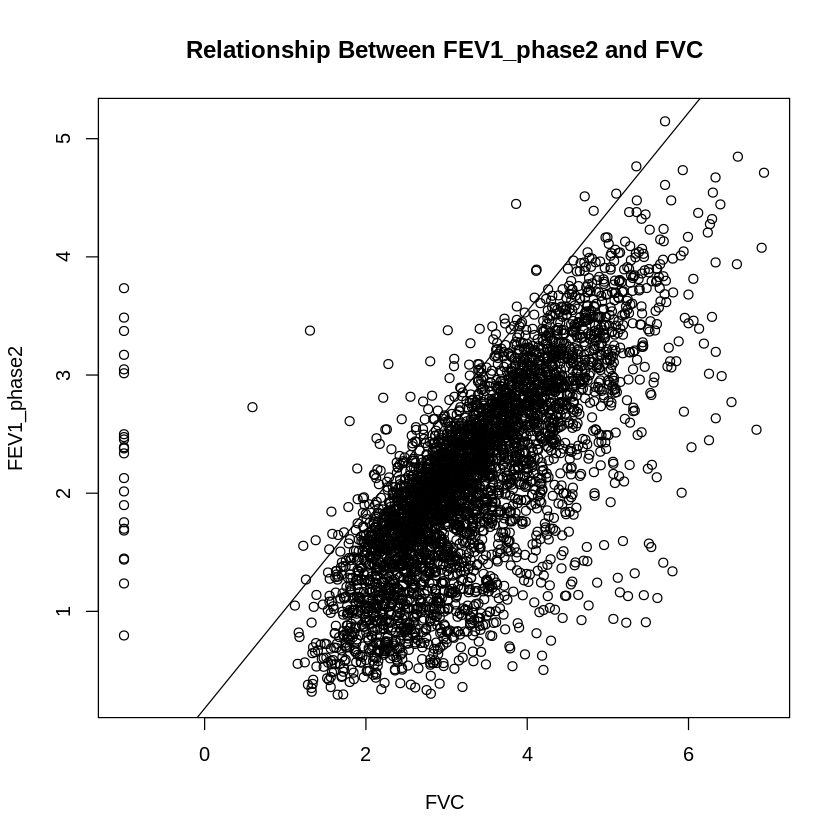

In [ ]:
#1.1.
plot(dat1$FVC, dat1$FEV1_phase2,
     xlab = "FVC",
     ylab = "FEV1_phase2",
     main = "Relationship Between FEV1_phase2 and FVC")

     abline(fit)

1.1- I notice a somewhat positive linear relationship between FEV1_phase2 and FVC. This relationship makes sense in context to the variables. Typically with COPD patients, FEV1_phase2 or FEV1 in general is decreased and that is the same for FVC (According to the National Institutes of Health). As we can see from the scatterplot this is true. Lower levels of FEV1_phase2 correlate to lower levels of FVC. As levels of FEV1_phase2 increase or improve so do the levels of FVC.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3769154/#:~:text=Patients%20with%20COPD%20typically%20show,the%20decrease%20in%20bronchodilator%20response.

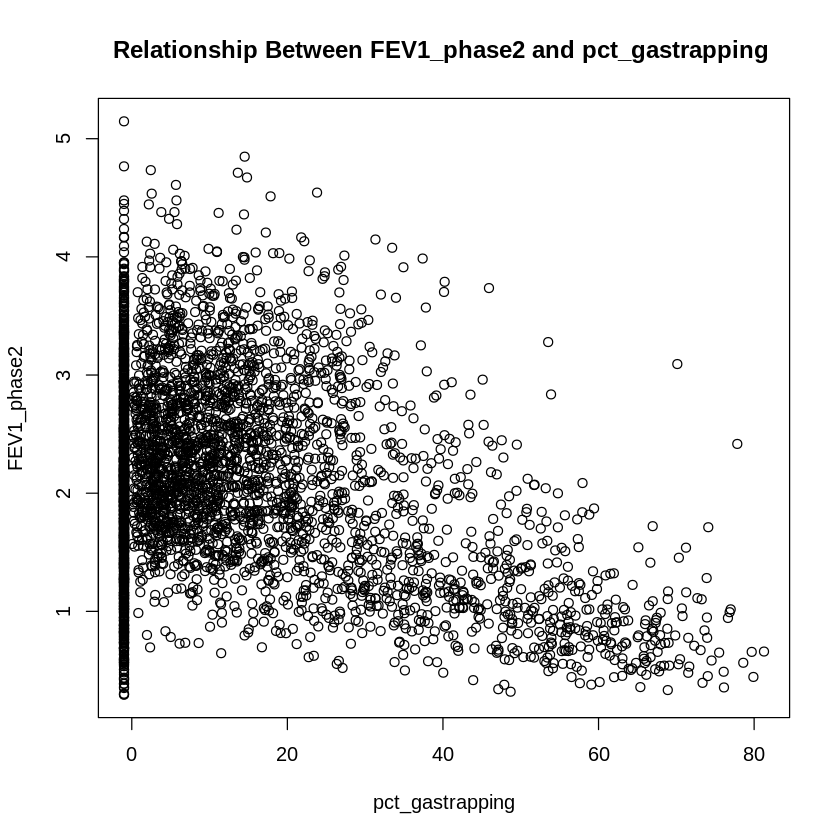

In [ ]:
#1.2.
plot(dat1$pct_gastrapping, dat1$FEV1_phase2,
     xlab = "pct_gastrapping",
     ylab = "FEV1_phase2",
     main = "Relationship Between FEV1_phase2 and pct_gastrapping ")



1.2- From this scatterplot that shows the realtionship between pct_gastrapping and FEV1_phase2 I notice a somewhat negative "linear" or negative exponential realtionship. I believe that the relationship shown on the scatterplot is fitting for the two variables. As we know, a lower level of FEV1_phase2 means that the copd is worse in the patient. Pct_gastrapping refers to the percent of air trapping in the lungs after exhaling. When pct_gastrapping is higher this leads to a person feeling shortness of breath. (American Thoracic Society).The correlation between the two variables makes sense in the context of copd. A person with lower FEV1_phase2 or a bad case of copd would have higher air trapping in their lungs.

Source: chrome-extension://bdfcnmeidppjeaggnmidamkiddifkdib/viewer.html?file=https://www.thoracic.org/patients/patient-resources/resources/copd-intro.pdf

In [ ]:
#2
fit7 <- lm(FEV1_phase2 ~ FEV1 + FVC + pct_gastrapping, data = dat1)
summary(fit7)


Call:
lm(formula = FEV1_phase2 ~ FEV1 + FVC + pct_gastrapping, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5882 -0.1867 -0.0254  0.1533  4.2137 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.3640558  0.0207171  17.573  < 2e-16 ***
FEV1             0.9741320  0.0159747  60.980  < 2e-16 ***
FVC             -0.1431752  0.0129131 -11.088  < 2e-16 ***
pct_gastrapping -0.0013438  0.0004107  -3.272  0.00108 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3686 on 3996 degrees of freedom
Multiple R-squared:  0.8011,	Adjusted R-squared:  0.801 
F-statistic:  5366 on 3 and 3996 DF,  p-value: < 2.2e-16


In [ ]:
#3.1
t.test(dat1$FEV1_phase2,dat1$FVC)$conf.int

[1] -1.249045 -1.167809
attr(,"conf.level")
[1] 0.95

3.1- The slope for this is significantly different from 0 because 0 is not included in the interval.

In [ ]:
#3.2
t.test(dat1$FEV1_phase2, dat1$pct_gastrapping)$conf.int

[1] -11.88365 -10.79612
attr(,"conf.level")
[1] 0.95

3.2- The slope for this is significantly different from 0 because 0 is not included in the interval.

####<font color=red>Task 8</font> (5 points)

1. Using your regression model with three variables from Task 7, predict the `FEV1_phase2`.
2. Calculate the root mean squared error. Is this error large or small? Explain your answer.


```
# Hint
y <- dat1$FEV1_phase2
y_predicted <- fitted(lm(...))

# root mean squared error
rmse <- sqrt(mean((y - y_predicted)^2))
```




In [ ]:
#8

y <- dat1$FEV1_phase2
y_predicted <- fitted(lm(FEV1_phase2 ~ FEV1 + FVC + pct_gastrapping, data = dat1))

# root mean squared error
rmse <- sqrt(mean((y - y_predicted)^2))
rmse

[1] 0.3684011

8- I would say that this root mean squared error is good and relatively small. A perfect root mean squared error is 0 mine is 0.3 which is pretty close. A good rule of thumb is a RMSW between 0.2 and 0.5 show that the model can predict the data relatively accurately.

<br>

---

<br>






####<font color=red>Task 9</font> Group Task (15 points)

1. Using the statistical/machine learning concepts from class, build a model (regression or random forest) that best predicts the `FEV1_phase2` variable in the `dat2` dataframe.
2. Submit your predictions as a csv file in the format presented in the `copd_predictions.csv` file on Canvas.

<br>
<br>

* The group with the lowest prediction error will receive 10 points extra credit on their overall project grade.
* The group with the second lowest prediction error will receive 5 points extra credit on their overall project grade.
* The group with the third lowest prediction error will receive 2 points extra credit on their overall project grade.

In [ ]:
# Load randomForest library
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
# randomly sample  rows from the dataset
samp <- sample(1:nrow(dat1), 3000)
train <- dat1[samp, ]
nrow(train)


# Use the remaining rows as validation
valid <- dat1[-samp, ]
nrow(valid)


[1] 3000

[1] 1000

In [ ]:
# Mean squared error function
mse <- function(true, pred) {
  return(mean((true - pred)^2))
}

In [ ]:
# random forest      #y     #x
fit1 <- randomForest(FEV1_phase2 ~ FEV1 + FVC + FEV1_FVC_ratio +height_cm + gender + insp_meanatt + total_lung_capacity,
                    data = train,
                    importance = TRUE,

                    # very flexible model (sometime thet don't preform well)
                    # hyperparameters (change to improve predictions)
                    ntree    = 500,  # number of trees to fit # 500 or more but always try different opotions
                    mtry     = 7,   # number of variables to sample per tree
                    nodesize = 1,    # minimum size of terminal nodes (leaf)
                    maxnodes = NULL, # maximum number of terminal nodes a tree can have
                    )
                    # calculate MSE on testing dataset
mse(valid$FEV1_phase2, predict(fit1, newdata = valid))

# calculate RMSE on testing dataset
sqrt(mse(valid$FEV1_phase2, predict(fit1, newdata = valid)))

[1] 0.09532406

[1] 0.3087459

In [ ]:
#2.

FEV1_phase2_predictions <- predict(fit1, dat2)

preds <- data.frame(sid = dat2$sid, FEV1_phase2_predictions)

write.csv(preds, 'copd_predictions.csv')


<br>

---

<br>






####<font color=red>Task 10</font> (20 points)

Write a 500-750 word abstract describing your analysis. Note this is a formal writeup and should be written with proper spelling and grammar. Imagine you are submitting this abstract to a conference for review. The writeup should include the following:

* Introduction to the topic of COPD and motivation for the analysis
* Description of the purpose of the study/report (what you were interested in finding)
* Briefly describe the data used to perform the analysis
* Description of the variables and methods used to conduct the analysis (data visualization, t-tests, regression, random forests, etc.)
* Description of the major results (estimates, significance, etc.)
* Major conclusions from the analysis in the context of the original application.



10-

Chronic obstructive pulmonary disease also known as COPD is a progressive disease that affects the lungs. COPD causes less airflow in the lungs which makes it harder for one to breathe. The biggest cause of COPD is smoking cigarettes, but approximately 30% of people with the disease have never smoked before. The disease affects about 16 million people in the United States and is the fourth leading cause of death according to the CDC. (National Heart, Lung and Blood Institute).



Knowing how many people COPD affects and how deadly it is, we are interested in learning more about this disease through statistical studies. In my statistical analysis I examined a data set regarding COPD founded by the COPDgene research group. The data was measured using a spirometer, a device used to determine the severity of COPD. Participants exhale forcefully into the spirometer and the volume of air exhaled is used to measure the severity of the disease. The less air blown out means that the disease is more severe. The more air blown out means that the disease is less severe. In my analysis, I was examining the relationship between FEV1 phase two and other variables in the data set.





The variable FEV1 stands for forced expiratory volume in liters. This means the volume of air forcefully exhaled in one second. FEV1 phase two is the measure of FEV1 five years after the initial data was taken. Some other variables that I used in my analysis include, total lung capacity. Total lung capacity is a measure of the total volume of air in the lungs at full inspiration or full breath hold. Another important variable I used is smoking status. Smoking status is a categorical variable that tells us if the participant is a current smoker, former smoker, or has never smoked before. Another variable FVC is the volume of air exhaled after a full breath. PCT Gas Trapping is the percentage of air trapping in the lungs after exhaling. The variable FEV1 FVC Ratio is the ratio between the two variables. Isnp Meanatt is the average lung density at a full breath hold. Some other self-explanatory variables that I used within my analysis include gender, race, and height.




To explore these variables I used many different statistical methods. To begin, I used many histograms to decide if the data followed a normal distribution. I then used boxplots to see the relationship between categorical variables and FEV1 Phase2. From these boxplots I was able to conclude that out of the smoking status groups, former smokers had the most severe case of COPD followed by current smokers and then people that have never smoked before. I was able to conclude that between men and women, women had a more severe case of COPD. From my last boxplot regarding race I was able to conclude that Black or African American people typically have a slightly worse case of COPD than White people. I also used scatterplots in my analysis to compare two continuous variables. For example I used a scatter plot to examine the relationship between FEV1 and FEV1 Phase2. I was able to conclude that these two variables have a positive linear relationship. I also performed regressions to see the significance of the variables and  examine the slopes to get a better understanding of the relationship between the variables and FEV1 Phase2. I was able to calculate the mean squared error on my regressions to see if the model was able to predict relatively accurately. Lastly, I was able to create a random forest in which I was trying to predict FEV1 Phase2 in a data set that contained all “N/A”s for the variable FEV1 Phase2. All of these statistical methods helped me create a conclusion regarding the COPD data set more specifically the relationship between FEV1 Phase2 and other variables in the data set. I was able to conclude that variables including FEV1, FVC, FEV1 FVC ratio, gender, insp Meanatt, and total lung capacity all have a huge correlation with FEV1 phase2.  



Source: https://www.nhlbi.nih.gov/health/copd